<a href="https://colab.research.google.com/github/Leanse1/Computer-Vision-Basic-Projects/blob/main/Cats_v_Dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/Leanse1/Computer-Vision-Basic-Projects.git

Cloning into 'Computer-Vision-Basic-Projects'...


In [2]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

## Imported Api token from my account here

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Copy and Paste dataset API command

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

In [1]:
import subprocess

command = "chmod 600 /root/.kaggle/kaggle.json"
subprocess.run(command, shell=True)


CompletedProcess(args='chmod 600 /root/.kaggle/kaggle.json', returncode=1)

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 95s 128ms/step - loss: 0.8216 - accuracy: 0.6238 - val_loss: 0.6217 - val_accuracy: 0.6232
Epoch 2/10
625/625 [==============================] - 70s 110ms/step - loss: 0.5238 - accuracy: 0.7452 - val_loss: 0.5240 - val_accuracy: 0.7568
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4517 - accuracy: 0.7897 - val_loss: 0.6948 - val_accuracy: 0.7626
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.4081 - accuracy: 0.8237 - val_loss: 0.5506 - val_accuracy: 0.7562
Epoch 5/10
625/625 [==============================] - 70s 111ms/step - loss: 0.3304 - accuracy: 0.8550 - val_loss: 0.4491 - val_accuracy: 0.8242
Epoch 6/10
625/625 [==============================] - 71s 112ms/step - loss: 0.2387 - accuracy: 0.8968 - val_loss: 0.5069 - val_accuracy: 0.8216
Epoch 7/10
625/625 [==============================] - 70s 112ms/step - loss: 0.1642 - accuracy: 0.9348 - val_loss: 1.1818 - val_ac

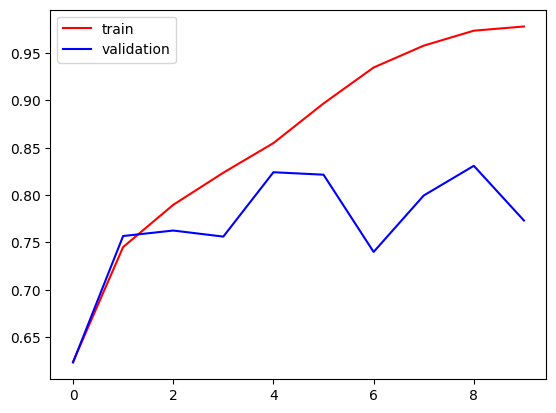

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

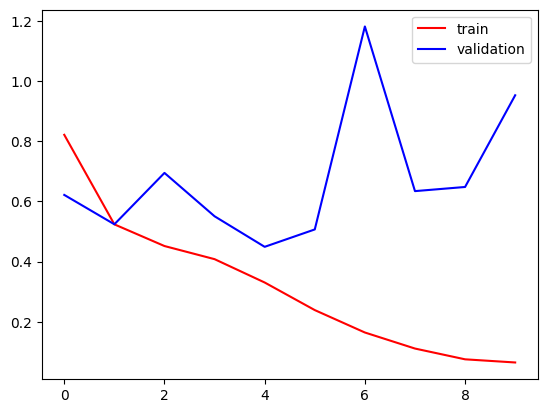

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm at low level
# Reduce complexity